In [37]:
import pandas as pd
import numpy as np
import seaborn as sns

In [38]:
song_df = pd.read_csv('../data/songs_database.csv')
# song_df["Artist"] = song_df["Artist"].apply(ast.literal_eval)

In [39]:
# song_df.head()
song_df.columns

Index(['Title', 'Artist', 'Album', 'ReleaseDate', 'ID', 'Key', 'BPM',
       'Acousticness', 'Popularity', 'Happiness', 'Danceability',
       'Instrumentalness', 'Energy', 'Speechiness', 'Loudness', 'Cover'],
      dtype='object')

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [41]:
DISPLAY_COLS = ["Title","Artist","Album","ReleaseDate","ID", "Key","BPM"]
NUMERIC_COLS = ["Acousticness", "Popularity", "Happiness", "Danceability", "Instrumentalness","Energy","Speechiness", "Loudness"]

RAP_SUBGENRES = ["trap","drill","bay-area","uk-drill","hip-hop","r-n-b"]

scaler = StandardScaler()
song_df[NUMERIC_COLS] = scaler.fit_transform(song_df[NUMERIC_COLS])
similarity_matrix = cosine_similarity(song_df[NUMERIC_COLS])

def get_similar_songs(song_id, top_n=5):
    song_index = song_df[song_df['ID'] == song_id].index[0]
    similarity_scores = similarity_matrix[song_index]
    
    # Get the indices of the top N similar songs (excluding the song itself)
    similar_indices = np.argsort(similarity_scores)[::-1][1:top_n+1]
    
    # Get the details of the similar songs
    similar_songs = song_df.iloc[similar_indices]
    return similar_songs[DISPLAY_COLS]

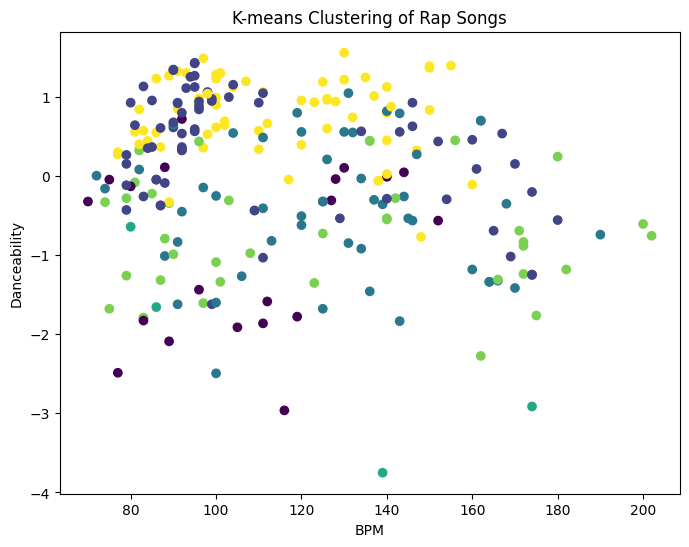


Cluster 0 songs:
                                      Title  \
4                           MEET YOUR PADRE   
8                                  CN TOWER   
9                              Trust Issues   
14                                Headlines   
18                               MOTH BALLS   
21                             Marvins Room   
23                        SOMEBODY LOVES ME   
29                      SPIDER-MAN SUPERMAN   
30                                 Practice   
33                       RAINING IN HOUSTON   
39                         PIMMIE'S DILEMMA   
54          30 For 30 (with Kendrick Lamar)   
71                        man at the garden   
80                                     YAH.   
107             Low Life (feat. The Weeknd)   
124                         LOVE YOU BETTER   
130        TELEKINESIS (feat. SZA & Future)   
144                           My Collection   
172                              Tupac Vest   
198  Thugz Mansion - 2Pac Original/Acousti

In [45]:
RAP_ARTISTS = ["Drake", "Kendrick Lamar", "Future", "Tupac", "50 Cent"]
# rap_songs_df = song_df[song_df["Artist"].isin(RAP_ARTISTS)]

# print(rap_songs_df.head())

kmeans = KMeans(n_clusters=6, random_state=42)
song_df['Cluster'] = kmeans.fit_predict(song_df[NUMERIC_COLS])

plt.figure(figsize=(8, 6))
plt.scatter(song_df['BPM'], song_df['Danceability'], c=song_df['Cluster'], cmap='viridis')
plt.xlabel('BPM')
plt.ylabel('Danceability')
plt.title('K-means Clustering of Rap Songs')
plt.show()

for i in range(kmeans.n_clusters):
    cluster_songs = song_df[song_df['Cluster'] == i]
    print(f"\nCluster {i} songs:")
    print(cluster_songs[['Title', 'Artist', 'Album', 'BPM', 'Danceability', 'Cluster']])

cluster_subgenres = {
    0: "trap",
    1: "hip-hop",
    2: "r-n-b",
    3: "drill",
    4: "bay-area",
    5: "uk-drill"
}

song_df['Sub-Genre'] = song_df['Cluster'].map(cluster_subgenres)

# Display songs with their assigned sub-genres
print(song_df[['Title', 'Artist', 'Sub-Genre']])